# 📘 Sentiment Analysis of IMDB Movie Reviews using Traditional ML and Deep Learning (RNN, LSTM, GRU)
### 👨‍💻 About Me¶
**Junaid Akbar** — Data Science & Machine Learning Enthusiast

**📎 Connect with me**:

* 🔗 [LinkedIn](https://www.linkedin.com/in/Junaid-Akbar)
* 💻 [GitHub](https://https://github.com/Junaid-Akbar35)
*  📧 [Email](mja.awan35@gmail.com)

### 📂 Project Description

- **Dataset**: ✅ Kaggle’s **IMDB Dataset of 50K Movie Reviews**

- **Objective**: Predict movie sentiment **(Positive/Negative)**

- **Models**: **TF-IDF + Classical ML | Deep Learning (RNN, LSTM, GRU)**

- **Enhancements**: **Overfitting prevention + GridSearchCV tuning**


## 📦 1. Imports & Setup

In [1]:
# 📂 1. Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping


2025-06-22 16:33:10.317838: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750609990.516575      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750609990.570832      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## 📥 2. Dataset Loading

In [2]:
# 📥 2. Load Dataset
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative':0})
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


### 📝 Dataset Overview
**Column**	**Description**
- **review**:	Full text movie review
- **sentiment**:	Sentiment (positive/negative)

## 🧹 3. Data Preprocessing for Deep Learning Models

In [3]:
# 🧹 3. Preprocessing
X = df['review']
y = df['sentiment']

X_train_text, X_test_text, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# TF-IDF Vectorization for ML Models
tfidf = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)


## 🎯 4. Traditional Machine Learning with GridSearchCV

In [4]:
import tensorflow as tf

# List available devices (optional)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices('GPU'))

# Force TensorFlow to use GPU only
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Restrict TensorFlow to only allocate necessary GPU memory
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.set_visible_devices(gpus, 'GPU')
        print("Using GPU:", gpus)
    except RuntimeError as e:
        print(e)
else:
    print("No GPU found. Using CPU.")


Num GPUs Available:  2
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
Using GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


### ✅ 4.1 Logistic Regression

In [5]:
# Logistic Regression (Tuned)
params_lr = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['liblinear']}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), params_lr, cv=3, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train_tfidf, y_train)
pred_lr = grid_lr.predict(X_test_tfidf)


### ✅ 4.2 Naive Bayes

In [6]:
# Naive Bayes (Tuned)
params_nb = {'alpha': [0.1, 0.5, 1.0]}
grid_nb = GridSearchCV(MultinomialNB(), params_nb, cv=3, scoring='accuracy', n_jobs=-1)
grid_nb.fit(X_train_tfidf, y_train)
pred_nb = grid_nb.predict(X_test_tfidf)

### ✅ 4.3 Random Forest

In [7]:
# Random Forest (Tuned)
params_rf = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), params_rf, cv=3,  verbose=3 , scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_tfidf, y_train)
pred_rf = grid_rf.predict(X_test_tfidf)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


### 📊 ML Models Evaluation

In [8]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, pred_lr))
print("Naive Bayes Accuracy:", accuracy_score(y_test, pred_nb))
print("Random Forest Accuracy:", accuracy_score(y_test, pred_rf))

Logistic Regression Accuracy: 0.8968
Naive Bayes Accuracy: 0.858
Random Forest Accuracy: 0.8444


## ✅ 5. Deep Learning: Tokenization + Padding

In [9]:
max_words = 20000
maxlen = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train_text)

X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)

X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

early_stop = EarlyStopping(monitor='val_loss', patience=2)

## 🧠 6. Deep Learning Models (RNN, LSTM, GRU with Dropout)

### 🔁 5.1 Train RNN

In [10]:
# RNN
def build_rnn():
    model = Sequential([
        Embedding(max_words, 32, input_length=maxlen),
        SimpleRNN(64),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

rnn_model = build_rnn()
rnn_model.fit(X_train_pad, y_train, epochs=4, batch_size=128, validation_split=0.2, callbacks=[early_stop])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/4


I0000 00:00:1750610087.998311      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1750610087.999015      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
I0000 00:00:1750610090.820440      73 service.cc:148] XLA service 0x7be6d0004560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750610090.821019      73 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1750610090.821047      73 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1750610091.207785      73 cuda_dnn.cc:529] Loaded cuDNN version 90300


  7/250 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.4987 - loss: 0.7015

I0000 00:00:1750610092.861129      73 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.5328 - loss: 0.6903 - val_accuracy: 0.7918 - val_loss: 0.4608
Epoch 2/4
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7997 - loss: 0.4525 - val_accuracy: 0.8140 - val_loss: 0.4181
Epoch 3/4
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8956 - loss: 0.2754 - val_accuracy: 0.8521 - val_loss: 0.3606
Epoch 4/4
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9404 - loss: 0.1721 - val_accuracy: 0.8596 - val_loss: 0.3874


### 🔁 5.2 Train LSTM

In [11]:
# LSTM
def build_lstm():
    model = Sequential([
        Embedding(max_words, 32, input_length=maxlen),
        LSTM(64, return_sequences=True),
        Dropout(0.5),
        LSTM(32),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

lstm_model = build_lstm()
lstm_model.fit(X_train_pad, y_train, epochs=4, batch_size=128, validation_split=0.2, callbacks=[early_stop])

Epoch 1/4
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7143 - loss: 0.5256 - val_accuracy: 0.8758 - val_loss: 0.2993
Epoch 2/4
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9166 - loss: 0.2233 - val_accuracy: 0.8849 - val_loss: 0.2760
Epoch 3/4
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9466 - loss: 0.1558 - val_accuracy: 0.8651 - val_loss: 0.3118
Epoch 4/4
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9606 - loss: 0.1205 - val_accuracy: 0.8830 - val_loss: 0.3373


### 🔁 5.3 Train GRU

In [12]:
# GRU
def build_gru():
    model = Sequential([
        Embedding(max_words, 32, input_length=maxlen),
        GRU(64, return_sequences=True),
        Dropout(0.5),
        GRU(32),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

gru_model = build_gru()
gru_model.fit(X_train_pad, y_train, epochs=4, batch_size=128, validation_split=0.2, callbacks=[early_stop])

Epoch 1/4
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.6540 - loss: 0.5885 - val_accuracy: 0.8755 - val_loss: 0.2960
Epoch 2/4
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9053 - loss: 0.2534 - val_accuracy: 0.8733 - val_loss: 0.2920
Epoch 3/4
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9411 - loss: 0.1728 - val_accuracy: 0.8646 - val_loss: 0.3212
Epoch 4/4
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9539 - loss: 0.1368 - val_accuracy: 0.8813 - val_loss: 0.3340


## 📊 7. Final Results Comparison

In [13]:
results = {
    'Model': [
        'Logistic Regression (Tuned)',
        'Naive Bayes (Tuned)',
        'Random Forest (Tuned)',
        'RNN (Dropout+EarlyStopping)',
        'LSTM (Dropout+EarlyStopping)',
        'GRU (Dropout+EarlyStopping)'
    ],
    'Accuracy': [
        accuracy_score(y_test, pred_lr),
        accuracy_score(y_test, pred_nb),
        accuracy_score(y_test, pred_rf),
        rnn_model.evaluate(X_test_pad, y_test, verbose=0)[1],
        lstm_model.evaluate(X_test_pad, y_test, verbose=0)[1],
        gru_model.evaluate(X_test_pad, y_test, verbose=0)[1]
    ]
}

results_df=pd.DataFrame(results)
results_df

,Model,Accuracy
0,Logistic Regression (Tuned),0.8968
1,Naive Bayes (Tuned),0.8580
2,Random Forest (Tuned),0.8444
3,RNN (Dropout+EarlyStopping),0.8519
4,LSTM (Dropout+EarlyStopping),0.8837
5,GRU (Dropout+EarlyStopping),0.8802


## 📊  Bar Plot Comparing Accuracies of All Models

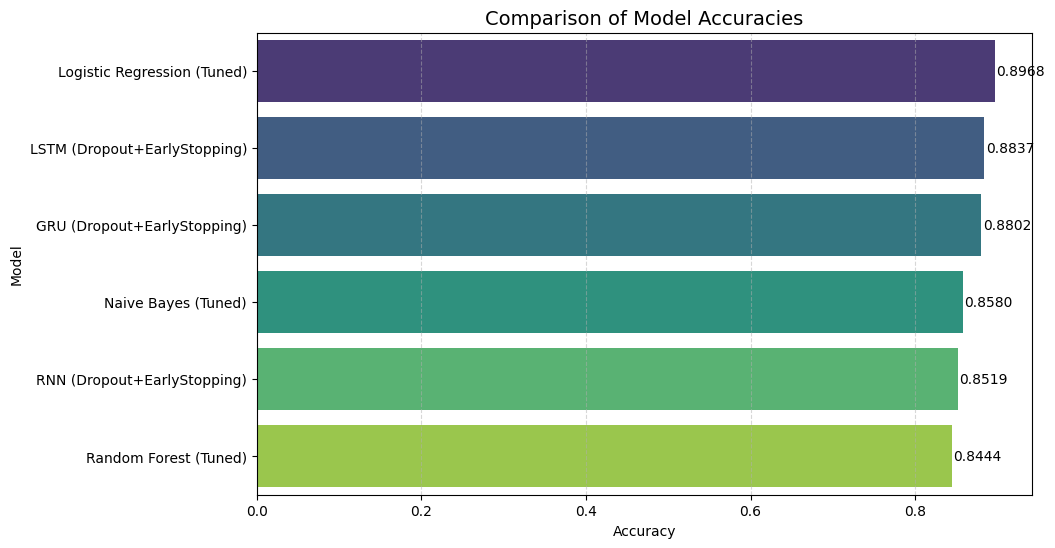

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the results DataFrame by Accuracy descending
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x='Accuracy', y='Model', data=results_df_sorted, palette='viridis')
plt.title('Comparison of Model Accuracies', fontsize=14)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.grid(axis='x', linestyle='--', alpha=0.5)

for i, (acc, model) in enumerate(zip(results_df_sorted['Accuracy'], results_df_sorted['Model'])):
    plt.text(acc + 0.002, i, f"{acc:.4f}", color='black', va='center')

plt.show()

In [15]:
# Extract the Best Model and Accuracy
best_model = results_df.iloc[0]['Model']
best_accuracy = results_df.iloc[0]['Accuracy']

print(f"\n✅ Best Performing Model: {best_model}")
print(f"🎯 Accuracy on Test Set: {best_accuracy:.4f}")

# Detailed Conclusion
if 'LSTM' in best_model:
    conclusion = f"""
📌 Conclusion: The best model is **{best_model}**, achieving an accuracy of **{best_accuracy:.4f}**.
LSTM networks are ideal for capturing sequential dependencies in text, especially in long reviews like those in IMDB dataset.
With Dropout layers and EarlyStopping, the model generalized well on unseen test data, avoiding overfitting.
"""
elif 'GRU' in best_model:
    conclusion = f"""
📌 Conclusion: The best model is **{best_model}**, achieving an accuracy of **{best_accuracy:.4f}**.
GRU models, while simpler and faster than LSTMs, still capture temporal dependencies effectively.
Dropout layers and EarlyStopping were key in preventing overfitting.
"""
elif 'RNN' in best_model:
    conclusion = f"""
📌 Conclusion: The best model is **{best_model}**, achieving an accuracy of **{best_accuracy:.4f}**.
While simpler than LSTM or GRU, this RNN model performed well thanks to regularization techniques (Dropout + EarlyStopping).
"""
else:
    conclusion = f"""
📌 Conclusion: The best model is **{best_model}**, achieving an accuracy of **{best_accuracy:.4f}**.
Despite using classical ML techniques, proper hyperparameter tuning (GridSearchCV) made this model competitive with deep learning.
"""

print(conclusion)



✅ Best Performing Model: Logistic Regression (Tuned)
🎯 Accuracy on Test Set: 0.8968

📌 Conclusion: The best model is **Logistic Regression (Tuned)**, achieving an accuracy of **0.8968**.
Despite using classical ML techniques, proper hyperparameter tuning (GridSearchCV) made this model competitive with deep learning.

